In [1]:
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from models import *

In [193]:
a = torch.load('tiger_files/pb29/checkpoint/final/synthetic_linear_net/epoch_30-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_64-lr_1.0.pt', map_location ='cpu')

b = torch.load('tiger_files/pb29/checkpoint/final/synthetic_linear_net/epoch_30-label_noise_prob_0-input_gaussian_noise_0.2-gaussian_noise_SD_0-batch_size_1024-lr_1.0.pt', map_location ='cpu')

c = torch.load('tiger_files/pb29/checkpoint/final/synthetic_linear_net/epoch_30-label_noise_prob_0.5-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_1024-lr_1.0.pt', map_location ='cpu')


In [194]:
print('test accuracy:', a['test_acc_array'][-1], b['test_acc_array'][-1], c['test_acc_array'][-1], '\n')
print('train loss:', a['train_loss_array'][-1], b['train_loss_array'][-1], c['train_loss_array'][-1])

b['best_acc']

test accuracy: 93.68 93.27 93.17 

train loss: 0.000413574702590704 3.306537304073572e-05 3.146090090274811e-05


93.33

In [182]:
# # Loading the nets

# net1 = VGG('VGG19')
# net1.load_state_dict(a['net'], strict=False)
# net1.eval()

# net2 = VGG('VGG19')
# net2.load_state_dict(b['net'], strict=False)
# net2.eval()

In [183]:
# Loading the nets

class Linear_mnist(nn.Module):
    def __init__(self):
        super(Linear_mnist, self).__init__()
        self.l1 = nn.Linear(784, 512)
        self.l2 = nn.Linear(512, 512)
        self.l3 = nn.Linear(512, 256)
        self.l4 = nn.Linear(256, 256)
        self.l5 = nn.Linear(256, 128)
        self.l6 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.l1(x)
        # x = F.relu(x)
        x = self.l2(x)
        # x = F.relu(x)
        # x = F.max_pool2d(x, 2)
        # x = self.dropout1(x)
        # x = torch.flatten(x, 1)
        # x = self.fc1(x)
        # x = F.relu(x)
        # x = self.dropout2(x)
        x = self.l3(x)
        x = self.l4(x)
        x = self.l5(x)
        x = self.l6(x)
        output = F.log_softmax(x, dim=0)
        return output


net1 = Linear_mnist()
net1.load_state_dict(a['net'], strict=False)
net1.eval()

net2 = Linear_mnist()
net2.load_state_dict(b['net'], strict=False)
net2.eval()

net3 = Linear_mnist()
net3.load_state_dict(c['net'], strict=False)
net3.eval()

Linear_mnist(
  (l1): Linear(in_features=784, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=512, bias=True)
  (l3): Linear(in_features=512, out_features=256, bias=True)
  (l4): Linear(in_features=256, out_features=256, bias=True)
  (l5): Linear(in_features=256, out_features=128, bias=True)
  (l6): Linear(in_features=128, out_features=10, bias=True)
)

In [184]:
for m in net1.modules():
    if isinstance(m, nn.Linear):
        print(m.bias)
    

Parameter containing:
tensor([ 2.8491e-01,  2.9814e-01,  3.0933e-01, -3.4926e-01,  1.2246e+00,
         3.0278e-01,  7.7068e-02,  3.5604e-02,  8.6770e-01,  4.2898e-01,
         1.1105e+00,  1.8978e+00,  2.2070e+00,  9.1095e-01, -2.6012e-01,
         1.7751e+00,  3.0022e-01,  2.3417e+00,  3.0763e-01,  4.0756e-01,
         1.8898e+00,  5.3586e-01,  8.1698e-01,  7.9583e-01,  1.8442e+00,
         3.6026e-01,  9.2763e-01,  1.4212e+00,  1.0604e+00,  1.0879e+00,
         1.1298e+00,  5.1963e-01,  4.8318e-01,  1.1146e+00,  1.4656e+00,
         3.0140e-02,  9.8165e-01,  1.4121e+00,  1.4062e+00, -4.3218e-01,
         1.9605e+00,  3.0504e+00,  8.1711e-01, -3.2915e-01,  1.8793e+00,
         3.9608e-01,  1.6820e+00, -5.3074e-02, -4.4369e-01,  1.4301e+00,
        -7.6614e-01,  4.8237e-01,  1.6347e+00,  8.4616e-01,  1.9219e+00,
         9.1077e-01, -7.8863e-01, -2.1451e-01,  1.6871e+00,  1.6781e+00,
         1.3360e+00,  2.6288e-01,  2.2412e+00,  6.0016e-01,  1.0731e+00,
         7.5919e-01, -2.4376e

In [185]:
# loading the data

class LinearNetData(torch.utils.data.Dataset):
    def __init__(self, list_IDs, labels, inputs):
        'Initialization'
        self.labels = labels
        self.list_IDs = list_IDs
        self.inputs = inputs
    
    def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)
    
    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        X = self.inputs[ID]
        y = self.labels[ID]



dataset1 = torch.load('data/synthetic_linear_net/training.pt')
dataset2 = torch.load('data/synthetic_linear_net/test.pt')


# plot 6 examples of data point
# a.shape

# for i in range(3):
#   print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
#   print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

# fig = plt.figure()
# for i in range(3):
#   plt.subplot(2,3,i+1)
#   plt.tight_layout()
#   plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
#   plt.title("Ground Truth: {}".format(example_targets[i]))
#   plt.xticks([])
#   plt.yticks([])
# fig

# a.size()

In [186]:
x = dataset1.inputs[1]

x=net1.l1(x)
x=net1.l2(x)
x=net1.l3(x)
x=net1.l4(x)
x=net1.l5(x)
x=net1.l6(x)
y = x
x = F.log_softmax(x,0)

print(x, y)

tensor([-4.4466e+01, -2.9977e+01, -3.8667e+01, -1.1921e-07, -7.3555e+01,
        -4.5725e+01, -5.2855e+01, -3.5616e+01, -1.6418e+01, -7.8282e+01],
       grad_fn=<LogSoftmaxBackward>) tensor([ -7.6173,   6.8721,  -1.8180,  36.8487, -36.7067,  -8.8767, -16.0064,
          1.2329,  20.4307, -41.4334], grad_fn=<AddBackward0>)


In [187]:
Jac_1 = {}
Jac_2 = {}
Jac_3 = {}
# Jac_diff = {}

for i in range(1,21):
    x = dataset1.inputs[i]
    Jac_1[i] = torch.autograd.functional.jacobian(net1, x, create_graph = True)
    Jac_2[i] = torch.autograd.functional.jacobian(net2, x, create_graph = True)
    Jac_3[i] = torch.autograd.functional.jacobian(net3, x, create_graph = True)
#     Jac_diff[i] = torch.autograd.functional.jacobian(net_diff, example_data[i:i+1,:,:,:], create_graph = True)

In [188]:
# Jac_1[0] == Jac_2[0]

In [189]:
v_3 = np.zeros(20)
v_4 = np.zeros(20)

for i in range(1,21):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have (1/2)', (torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))), '\n')
    v_3[i-1] = torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))

for i in range(1,21):
    print('on the datapoint', i, 'we have (1/3)', (torch.norm((Jac_1[i])) / torch.norm((Jac_3[i]))), '\n')
    v_4[i-1] = torch.norm((Jac_1[i])) / torch.norm((Jac_3[i]))


on the datapoint 1 we have (1/2) tensor(1.1159, grad_fn=<DivBackward0>) 

on the datapoint 2 we have (1/2) tensor(1.1174, grad_fn=<DivBackward0>) 

on the datapoint 3 we have (1/2) tensor(1.1116, grad_fn=<DivBackward0>) 

on the datapoint 4 we have (1/2) tensor(1.1455, grad_fn=<DivBackward0>) 

on the datapoint 5 we have (1/2) tensor(1.1150, grad_fn=<DivBackward0>) 

on the datapoint 6 we have (1/2) tensor(1.1157, grad_fn=<DivBackward0>) 

on the datapoint 7 we have (1/2) tensor(1.1159, grad_fn=<DivBackward0>) 

on the datapoint 8 we have (1/2) tensor(1.1320, grad_fn=<DivBackward0>) 

on the datapoint 9 we have (1/2) tensor(1.1084, grad_fn=<DivBackward0>) 

on the datapoint 10 we have (1/2) tensor(1.1162, grad_fn=<DivBackward0>) 

on the datapoint 11 we have (1/2) tensor(1.1155, grad_fn=<DivBackward0>) 

on the datapoint 12 we have (1/2) tensor(1.1138, grad_fn=<DivBackward0>) 

on the datapoint 13 we have (1/2) tensor(1.1140, grad_fn=<DivBackward0>) 

on the datapoint 14 we have (1/2) 

In [190]:
for i in range(1,21):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'the difference of the two Jacobians is (1-2)/1', torch.norm(Jac_1[i]-Jac_2[i])/torch.norm(Jac_1[i]))
#     print('on the datapoint', i, 'the difference of the two neural nets is', torch.norm(net_diff(example_data[i:i+1,:,:,:]))/torch.norm(net1(example_data[i:i+1,:,:,:])))

for i in range(1,21):
    print('on the datapoint', i, 'the difference of the two Jacobians is (1-3)/1', torch.norm(Jac_1[i]-Jac_3[i])/torch.norm(Jac_1[i]))


on the datapoint 1 the difference of the two Jacobians is (1-2)/1 tensor(0.1066, grad_fn=<DivBackward0>)
on the datapoint 2 the difference of the two Jacobians is (1-2)/1 tensor(0.1079, grad_fn=<DivBackward0>)
on the datapoint 3 the difference of the two Jacobians is (1-2)/1 tensor(0.1034, grad_fn=<DivBackward0>)
on the datapoint 4 the difference of the two Jacobians is (1-2)/1 tensor(0.1378, grad_fn=<DivBackward0>)
on the datapoint 5 the difference of the two Jacobians is (1-2)/1 tensor(0.1063, grad_fn=<DivBackward0>)
on the datapoint 6 the difference of the two Jacobians is (1-2)/1 tensor(0.1068, grad_fn=<DivBackward0>)
on the datapoint 7 the difference of the two Jacobians is (1-2)/1 tensor(0.1066, grad_fn=<DivBackward0>)
on the datapoint 8 the difference of the two Jacobians is (1-2)/1 tensor(0.1262, grad_fn=<DivBackward0>)
on the datapoint 9 the difference of the two Jacobians is (1-2)/1 tensor(0.1011, grad_fn=<DivBackward0>)
on the datapoint 10 the difference of the two Jacobians

In [191]:
Jac_4 = {}
Jac_5 = {}
Jac_6 = {}
# Jac_diff = {}

for i in range(1,21):
    x = dataset2.inputs[i+50000]
    Jac_4[i] = torch.autograd.functional.jacobian(net1, x, create_graph = True)
    Jac_5[i] = torch.autograd.functional.jacobian(net2, x, create_graph = True)
    Jac_6[i] = torch.autograd.functional.jacobian(net3, x, create_graph = True)

In [192]:
v_1 = np.zeros(20)
v_2 = np.zeros(20)

for i in range(1,21):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have (1/2)', (torch.norm((Jac_4[i])) / torch.norm((Jac_5[i]))), '\n')
    v_1[i-1] = torch.norm((Jac_4[i])) / torch.norm((Jac_5[i]))
    
for i in range(1,21):
    print('on the datapoint', i, 'we have (1/3)', (torch.norm((Jac_4[i])) / torch.norm((Jac_6[i]))), '\n')
    v_2[i-1] = torch.norm((Jac_4[i])) / torch.norm((Jac_6[i]))
    


on the datapoint 1 we have (1/2) tensor(1.1125, grad_fn=<DivBackward0>) 

on the datapoint 2 we have (1/2) tensor(1.1159, grad_fn=<DivBackward0>) 

on the datapoint 3 we have (1/2) tensor(1.0943, grad_fn=<DivBackward0>) 

on the datapoint 4 we have (1/2) tensor(1.1178, grad_fn=<DivBackward0>) 

on the datapoint 5 we have (1/2) tensor(1.1151, grad_fn=<DivBackward0>) 

on the datapoint 6 we have (1/2) tensor(1.1084, grad_fn=<DivBackward0>) 

on the datapoint 7 we have (1/2) tensor(1.1140, grad_fn=<DivBackward0>) 

on the datapoint 8 we have (1/2) tensor(1.1116, grad_fn=<DivBackward0>) 

on the datapoint 9 we have (1/2) tensor(1.1172, grad_fn=<DivBackward0>) 

on the datapoint 10 we have (1/2) tensor(1.1138, grad_fn=<DivBackward0>) 

on the datapoint 11 we have (1/2) tensor(1.1084, grad_fn=<DivBackward0>) 

on the datapoint 12 we have (1/2) tensor(1.1159, grad_fn=<DivBackward0>) 

on the datapoint 13 we have (1/2) tensor(1.1155, grad_fn=<DivBackward0>) 

on the datapoint 14 we have (1/2) 

# Plotting

In [195]:
toplot = {
    'train - input noise': {'color': 'C0'},
    'test - input noise': { 'color': "C1"},
    'train - label 0.5': {'color': 'C2'},
    'test - label 0.5': { 'color': "C3"},
}
 
results = {}

for label, fields in toplot.items():
        if label == 'train - input noise':
           # accuracy_adam = mean_ad
            results[label] = v_3
        if label == 'test - input noise':
          #  accuracy_da = mean
            results[label] = v_1
        if label == 'train - label 0.5':
           # accuracy_adam = mean_ad
            results[label] = v_4
        if label == 'test - label 0.5':
          #  accuracy_da = mean
            results[label] = v_2
            
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'train - input noise':
           # accuracy_adam = mean_ad
            accuracy[label] = ('Train loss 3.30e-05')
        if label == 'test - input noise':
          #  accuracy_da = mean
            accuracy[label] = ('Test accuracy '+str(b['best_acc']))
        if label == 'train - label 0.5':
           # accuracy_adam = mean_ad
            accuracy[label] = ('Train loss 3.14e-05')
        if label == 'test - label 0.5':
          #  accuracy_da = mean
            accuracy[label] = ('Test accuracy '+str(c['best_acc']))

Saved jacobian_norm_ratio_128_linear_new.pdf


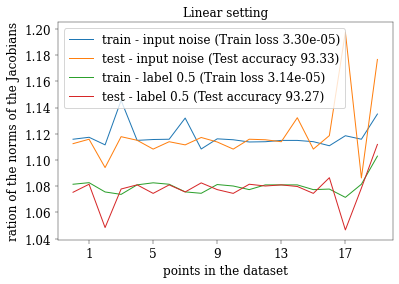

In [196]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]})"
    ax.plot(xp, arr_data, label=label)

plt.xticks(range(1,21,4))
ax.set_xlabel('points in the dataset')
ax.set_ylabel('ration of the norms of the Jacobians')
ax.set_title("Linear setting")
ax.legend(loc='upper left')

fname = "jacobian_norm_ratio_128_linear_new.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

In [197]:
toplot = {
    'SGD': {'color': 'C0'},
    'GD + input noise': { 'color': "C1"},
    'GD + label noise': { 'color': "C2"},
}
 
results = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results[label]=a['test_acc_array'][:20]
        if label == 'GD + input noise':
          #  accuracy_da = mean
            results[label]=b['test_acc_array'][:20]
        if label == 'GD + label noise':
          #  accuracy_da = mean
            results[label]=c['test_acc_array'][:20]
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            results[label]=d['test_acc_array'][:20]
            
results_1 = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results_1[label]=a['train_loss_array'][:20]
        if label == 'GD + input noise':
          #  accuracy_da = mean
            results_1[label]=b['train_loss_array'][:20]
        if label == 'GD + label noise':
          #  accuracy_da = mean
            results_1[label]=c['train_loss_array'][:20]
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            results_1[label]=d['train_loss_array'][:20]
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            accuracy[label]=a['best_acc']
        if label == 'GD + input noise':
          #  accuracy_da = mean
            accuracy[label]=b['best_acc']
        if label == 'GD + label noise':
          #  accuracy_da = mean
            accuracy[label]=c['best_acc']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            accuracy[label]=d['best_acc']

In [198]:
accuracy

{'SGD': 93.69, 'GD + input noise': 93.33, 'GD + label noise': 93.27}

Saved Linear_net_test_acc_new.pdf


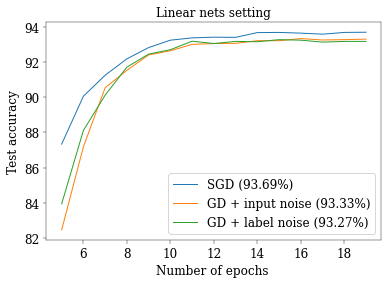

In [199]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]:2.2f}%)"
    ax.plot(xp[5:], arr_data[5:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test accuracy')
ax.set_title("Linear nets setting")
ax.legend(loc='lower right')

fname = "Linear_net_test_acc_new.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved Linear_net_train_loss_new.pdf


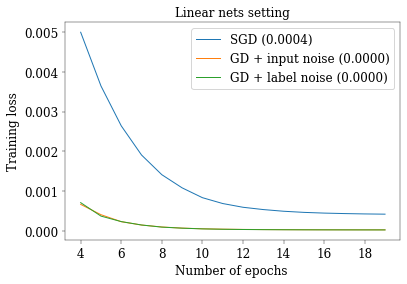

In [166]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp[4:], arr_data[4:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("Linear nets setting")
ax.legend(loc='upper right')

fname = "Linear_net_train_loss_new.pdf"
plt.savefig(fname)
print(f"Saved {fname}")